<a href="https://colab.research.google.com/github/kisozipaul/feature_selection/blob/main/predictingmaizeafterselecting_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
pip install boruta

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("/content/drive/MyDrive/dataset/final_selection_Neq_complete.csv")
df.head()


,ID,survey,country,year,field_latitude,field_longitude,plant_date,harvest_date,gs_length,yield_kg_ph,hybrid,intercrop,esa_avg,chirps_sum,era_temp_mean_avg,era_temp_min_avg,era_temp_max_avg,kdd_event,kdd_result,N_kg_ph
0,ID_00001,Burundi_2017,Burundi,2017,-3.342123,29.680414,2016-10-11,2017-02-18,130,1022.9999,0,1,0.378106,658.840140,19.517542,15.714086,24.011527,0,0.0,8.571429
1,ID_00002,Burundi_2017,Burundi,2017,-3.415065,29.680096,2016-10-05,2017-03-06,152,1479.0000,0,1,0.383637,831.012336,19.445885,15.743151,23.789170,0,0.0,12.000001
2,ID_00003,Burundi_2017,Burundi,2017,-3.256188,29.729570,2016-10-15,2017-03-02,138,1087.2000,0,1,0.382994,649.185262,19.412835,15.682174,23.868564,0,0.0,10.000000
3,ID_00004,Burundi_2017,Burundi,2017,-3.335263,29.949808,2016-11-05,2017-03-17,132,3930.0000,1,1,0.326727,611.220825,19.317380,15.063671,23.855338,0,0.0,10.588236
4,ID_00005,Burundi_2017,Burundi,2017,-3.211152,29.736542,2016-10-02,2017-02-13,134,1993.2001,0,1,0.343481,604.013831,19.882962,16.037863,24.537970,0,0.0,10.526316


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17140 entries, 0 to 17139
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 17140 non-null  object 
 1   survey             17140 non-null  object 
 2   country            17140 non-null  object 
 3   year               17140 non-null  int64  
 4   field_latitude     17140 non-null  float64
 5   field_longitude    17140 non-null  float64
 6   plant_date         17140 non-null  object 
 7   harvest_date       17140 non-null  object 
 8   gs_length          17140 non-null  int64  
 9   yield_kg_ph        17140 non-null  float64
 10  hybrid             17140 non-null  int64  
 11  intercrop          17140 non-null  int64  
 12  esa_avg            17140 non-null  float64
 13  chirps_sum         17140 non-null  float64
 14  era_temp_mean_avg  17140 non-null  float64
 15  era_temp_min_avg   17140 non-null  float64
 16  era_temp_max_avg   171

In [5]:
df.describe()

,year,gs_length,yield_kg_ph,hybrid,intercrop,esa_avg,chirps_sum,era_temp_mean_avg,era_temp_min_avg,era_temp_max_avg,kdd_event,kdd_result,N_kg_ph
count,17140.000000,1.714000e+04,1.714000e+04,17140.000000,17140.000000,1.714000e+04,1.714000e+04,1.714000e+04,1.714000e+04,1.714000e+04,1.714000e+04,1.714000e+04,1.714000e+04
mean,2018.764177,3.449076e-16,-1.052963e-16,0.855543,0.656943,-5.472091e-16,1.442642e-16,1.989851e-17,9.617615e-17,2.188836e-16,1.193911e-16,-2.321493e-16,4.908300e-16
std,1.087695,1.000000e+00,1.000000e+00,0.351563,0.474744,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,2016.000000,-1.961062e+00,-2.020831e+00,0.000000,0.000000,-3.910254e+00,-3.051100e+00,-3.480002e+00,-3.246983e+00,-3.595184e+00,-5.340668e-01,-4.157416e-01,-8.292998e-01
25%,2018.000000,-7.380351e-01,-7.370116e-01,1.000000,0.000000,-6.749727e-01,-7.110164e-01,-7.037010e-01,-7.533330e-01,-6.309372e-01,-5.340668e-01,-4.157416e-01,-8.292998e-01
50%,2019.000000,-1.570972e-01,-1.231269e-01,1.000000,1.000000,-7.474256e-02,-7.772471e-02,1.910248e-01,1.324297e-01,1.842018e-01,-5.340668e-01,-4.157416e-01,-3.250992e-01
75%,2020.000000,6.072946e-01,6.035463e-01,1.000000,1.000000,6.982688e-01,6.302060e-01,7.666011e-01,7.661150e-01,7.216428e-01,1.565160e-01,-1.710166e-01,6.328820e-01
max,2020.000000,3.817741e+00,6.044387e+00,1.000000,1.000000,3.450466e+00,4.576241e+00,2.112157e+00,2.715401e+00,2.353181e+00,8.213315e+00,1.148859e+01,1.093538e+01


In [6]:
df.isnull().sum()

,0
ID,0
survey,0
country,0
year,0
plant_date,0
harvest_date,0
gs_length,0
yield_kg_ph,0
hybrid,0
intercrop,0


In [10]:
df2 = df.drop(["ID","survey", "country","plant_date", "harvest_date", "field_latitude","field_longitude"], axis=1)
df2.head()

,year,gs_length,yield_kg_ph,hybrid,intercrop,esa_avg,chirps_sum,era_temp_mean_avg,era_temp_min_avg,era_temp_max_avg,kdd_event,kdd_result,N_kg_ph
0,2017,130,1022.9999,0,1,0.378106,658.840140,19.517542,15.714086,24.011527,0,0.0,8.571429
1,2017,152,1479.0000,0,1,0.383637,831.012336,19.445885,15.743151,23.789170,0,0.0,12.000001
2,2017,138,1087.2000,0,1,0.382994,649.185262,19.412835,15.682174,23.868564,0,0.0,10.000000
3,2017,132,3930.0000,1,1,0.326727,611.220825,19.317380,15.063671,23.855338,0,0.0,10.588236
4,2017,134,1993.2001,0,1,0.343481,604.013831,19.882962,16.037863,24.537970,0,0.0,10.526316


<Axes: >

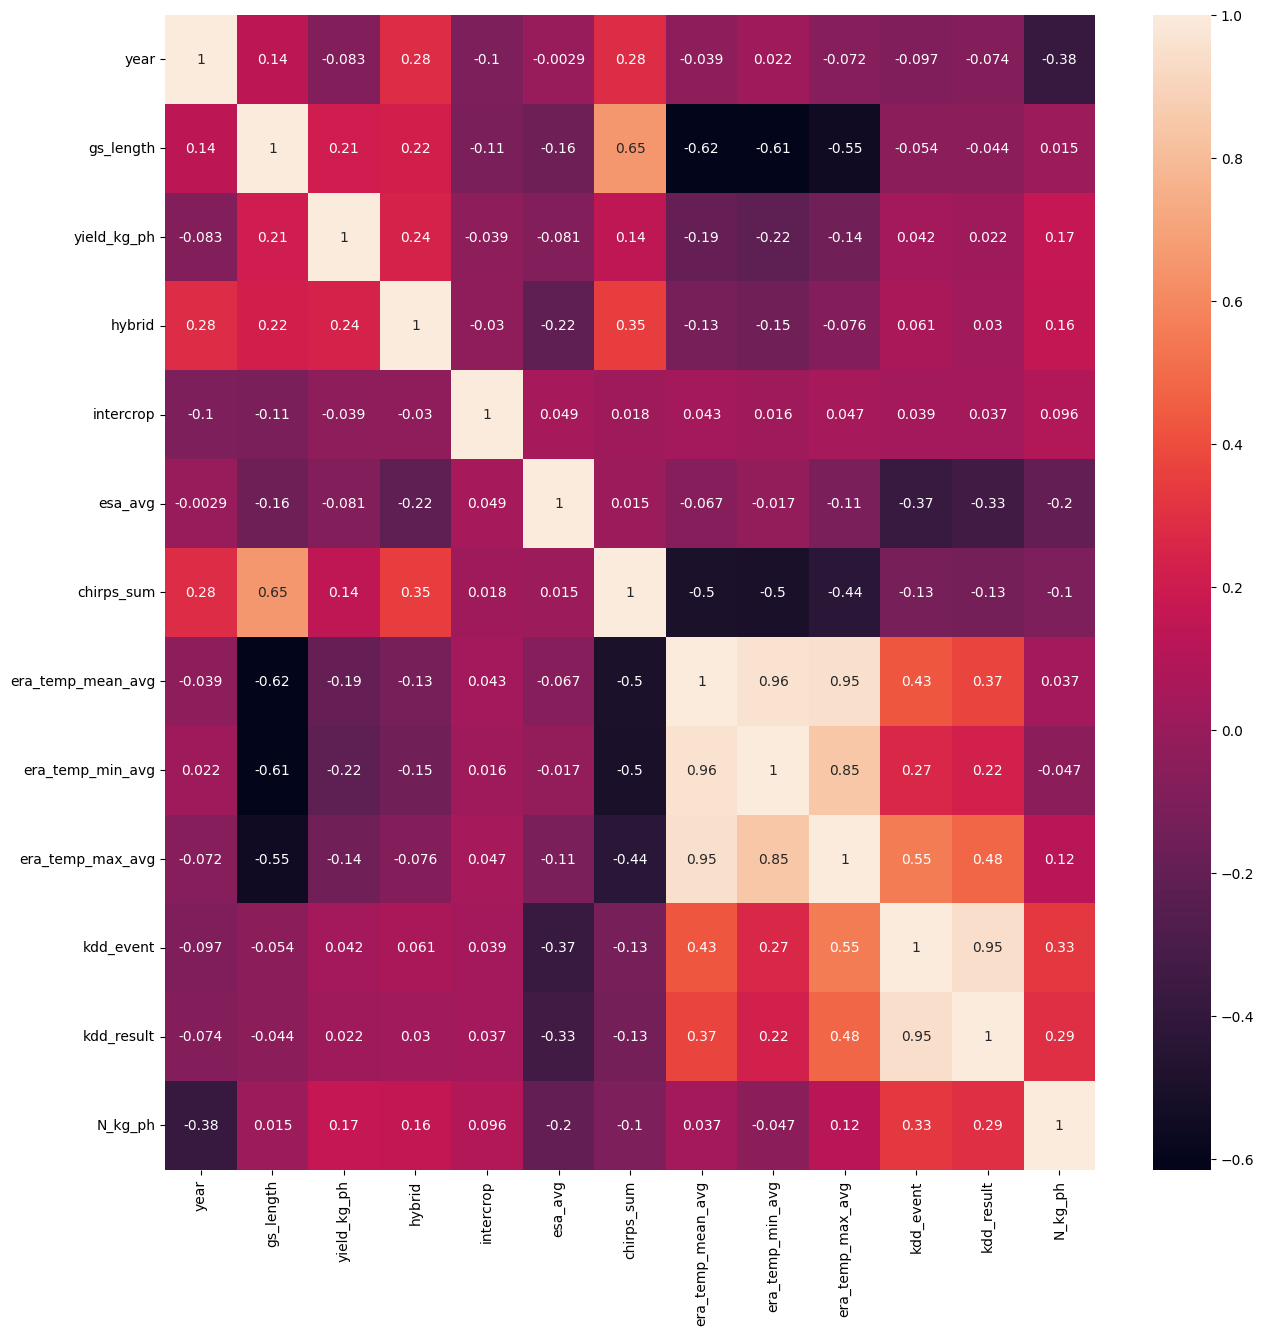

In [14]:
corl = df2.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corl, annot=True)

In [15]:
# Set your threshold for filtering correlations (absolute value)
threshold = 0.1

# Get the correlation values with 'Yield' column only
yield_corr = corl['yield_kg_ph'].abs()

# Select features where the correlation with 'Yield' is greater than the threshold
selected_features = yield_corr[yield_corr > threshold].index.tolist()

# Remove 'Yield' from the list if you only want to keep feature names
selected_features.remove('yield_kg_ph')

print("Selected features with correlation above threshold with Yield:", selected_features)

# Filter your DataFrame to include only these selected features and the target
df_selected = df2[selected_features + ['yield_kg_ph']]

Selected features with correlation above threshold with Yield: ['gs_length', 'hybrid', 'chirps_sum', 'era_temp_mean_avg', 'era_temp_min_avg', 'era_temp_max_avg', 'N_kg_ph']


In [16]:
df_selected.head()

,gs_length,hybrid,chirps_sum,era_temp_mean_avg,era_temp_min_avg,era_temp_max_avg,N_kg_ph,yield_kg_ph
0,130,0,658.840140,19.517542,15.714086,24.011527,8.571429,1022.9999
1,152,0,831.012336,19.445885,15.743151,23.789170,12.000001,1479.0000
2,138,0,649.185262,19.412835,15.682174,23.868564,10.000000,1087.2000
3,132,1,611.220825,19.317380,15.063671,23.855338,10.588236,3930.0000
4,134,0,604.013831,19.882962,16.037863,24.537970,10.526316,1993.2001


In [37]:
X = df_selected.drop(labels = ["yield_kg_ph"], axis=1)
y = df_selected["yield_kg_ph"].values

In [38]:
feature_names = np.array(X.columns)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [40]:

##Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
import xgboost as xgb
model = xgb.XGBRegressor()

In [42]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [43]:
# find all relevant features
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	0
Iteration: 	17 / 

BorutaPy(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None, device=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None,
                                learning_rate=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=37,
                                n_jobs=None, num_parallel_tree=None,
                                random_state=1475147222, ...),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x79C723D3CD40, verbose=2)

In [44]:

# check selected features
print(feat_selector.support_)

[ True  True  True  True  True  True  True]


In [45]:
# check ranking of features
print(feat_selector.ranking_)

[1 1 1 1 1 1 1]


In [46]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train)

In [47]:
# zip feature names, ranks, and decisions
feature_ranks = list(zip(feature_names,
                         feat_selector.ranking_,
                         feat_selector.support_))

# print the results
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: gs_length                      Rank: 1,  Keep: True
Feature: hybrid                         Rank: 1,  Keep: True
Feature: chirps_sum                     Rank: 1,  Keep: True
Feature: era_temp_mean_avg              Rank: 1,  Keep: True
Feature: era_temp_min_avg               Rank: 1,  Keep: True
Feature: era_temp_max_avg               Rank: 1,  Keep: True
Feature: N_kg_ph                        Rank: 1,  Keep: True


In [49]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_filtered, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:

#First apply feature selector transform to make sure same features are selected from test data
X_test_filtered = feat_selector.transform(X_test)
prediction_xgb = xgb_model.predict(X_test_filtered)


In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Metrics calculation
r_score = r2_score(y_test, prediction_xgb)
mse = mean_squared_error(y_test, prediction_xgb)
made = mean_absolute_error(y_test, prediction_xgb)

print(f"R-Score: {r_score}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Deviation Error (MADE): {made}")

R-Score: 0.1493964175677942
Mean Squared Error (MSE): 2037944.0828222705
Mean Absolute Deviation Error (MADE): 1118.5368419370363
